### 导入依赖，加载数据

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt

# 设置图表中字体
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']

data_train = pd.read_csv('../data/train.csv')
data_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   NaN        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000   NaN        S  
4      0            373450   8.0500   NaN        S

### 分析数据，了解数据

In [2]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          189 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
data_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

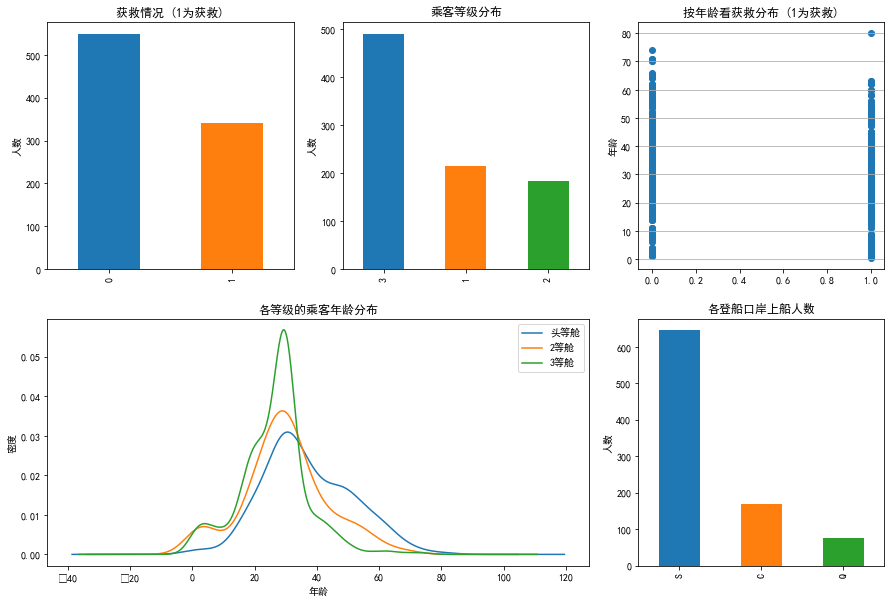

In [75]:
fig = plt.figure(figsize=(15,10))
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

plt.subplot2grid((2,3),(0,0))             # 在一张大图里分列几个小图
data_train.Survived.value_counts().plot(kind='bar')# 柱状图 
plt.title(u"获救情况 (1为获救)") # 标题
plt.ylabel(u"人数")  

plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind="bar")
plt.ylabel(u"人数")
plt.title(u"乘客等级分布")

plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel(u"年龄")                         # 设定纵坐标名称
plt.grid(b=True, which='major', axis='y') 
plt.title(u"按年龄看获救分布 (1为获救)")


plt.subplot2grid((2,3),(1,0), colspan=2)
data_train.Age[data_train.Pclass == 1].plot(kind='kde')   
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"年龄")# plots an axis lable
plt.ylabel(u"密度") 
plt.title(u"各等级的乘客年龄分布")
plt.legend((u'头等舱', u'2等舱',u'3等舱'),loc='best') # sets our legend for our graph.


plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title(u"各登船口岸上船人数")
plt.ylabel(u"人数")  
plt.show()

In [82]:
#看看各乘客等级的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)#化成两层
plt.title(u"各乘客等级的获救情况")
plt.xlabel(u"乘客等级") 
plt.ylabel(u"人数") 
plt.show()

In [83]:
plt.plot(np.arange(3)+1,np.array(Survived_1/Survived_0))

In [84]:
#性别和仓位关系的统计
Survived_0 = data_train.Pclass[data_train.Sex == 'male'].value_counts()
Survived_1 = data_train.Pclass[data_train.Sex == 'female'].value_counts()
df=pd.DataFrame({u'男':Survived_1, u'女':Survived_0})
df.plot(kind='bar', stacked=True)#化成两层
plt.title(u"各乘客等级的获救情况")
plt.xlabel(u"乘客等级") 
plt.ylabel(u"人数") 
plt.show()

In [6]:
#看看各性别的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df=pd.DataFrame({u'男性':Survived_m, u'女性':Survived_f})
df.plot(kind='bar', stacked=True)
plt.title(u"按性别看获救情况")
plt.xlabel(u"性别") 
plt.ylabel(u"人数")
plt.show()

In [7]:
#然后我们再来看看各种舱级别情况下各性别的获救情况
fig=plt.figure(figsize=(15,7))
fig.set(alpha=0.65) # 设置图像透明度，无所谓
plt.title(u"根据舱等级和性别的获救情况")

ax1=fig.add_subplot(141)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels([u"获救", u"未获救"], rotation=0)
ax1.legend([u"女性/高级舱"], loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"女性/低级舱"], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/高级舱"], loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/低级舱"], loc='best')

plt.show()

In [8]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各登录港口乘客的获救情况")
plt.xlabel(u"登录港口") 
plt.ylabel(u"人数") 

plt.show()

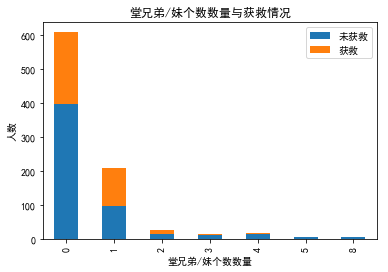

In [9]:
plt.figure(figsize=(15,7))
Survived_0 = data_train.SibSp[data_train.Survived == 0].value_counts()
Survived_1 = data_train.SibSp[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"堂兄弟/妹个数数量与获救情况")
plt.xlabel(u"堂兄弟/妹个数数量") 
plt.ylabel(u"人数") 
plt.show()

In [11]:
plt.plot(np.arange(7),Survived_1/Survived_0)
plt.title(u"堂兄弟/妹个数数量与获救/未获救的比例")

### 格式化数据，预处理数据

In [34]:
#为了简便年了暂时用平均数代替，
data_train.Age[data_train.Age.isnull()] = data_train.Age.mean()
#Cabin 缺少太多了，暂且踢掉
try:
    train_x = data_train[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
except:
    pass
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 48.8+ KB


d:\sorf\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
train_x.head()

Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  22.0      1      0   7.2500        S
1       1  female  38.0      1      0  71.2833        C
2       3  female  26.0      0      0   7.9250        S
3       1  female  35.0      1      0  53.1000        S
4       3    male  35.0      0      0   8.0500        S

In [36]:
train_x.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [37]:
train_x.Embarked.value_counts()

S    645
C    169
Q     77
Name: Embarked, dtype: int64

In [38]:
train_x.Sex[train_x.Sex=='male'] = 1
train_x.Sex[train_x.Sex=='female'] = 0
train_x.Embarked[train_x.Embarked=='S'] = 0
train_x.Embarked[train_x.Embarked=='C'] = 0.5
train_x.Embarked[train_x.Embarked=='Q'] = 1

d:\sorf\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
d:\sorf\anaconda3\lib\site-packages\pandas\core\generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
d:\sorf\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
d:\sorf\anaconda3\lib\

### 建立模型，训练模型

In [39]:
"""
添加神经网络层的函数
inputs -- 输入内容
in_size -- 输入尺寸
out_size -- 输出尺寸
activation_function --- 激励函数，可以不用输入
"""
def add_layer(inputs,in_size,out_size,activation_function=None):
    W = tf.Variable(tf.zeros([in_size,out_size])+0.01)   #定义，in_size行,out_size列的矩阵,随机矩阵，全为0效果不佳
    b = tf.Variable(tf.zeros([1,out_size])+0.01)              #不建议为0
    Wx_plus_b = tf.matmul(inputs,W) + b                # WX + b
    if activation_function is None:                               #如果有激励函数就激励，否则直接输出
        output = Wx_plus_b
    else:
        output = activation_function(Wx_plus_b)
    return output

In [68]:
import tensorflow as tf
X = tf.placeholder(tf.float32,[None,7])
Y = tf.placeholder(tf.float32,[None,1])


output1 = add_layer(X,7,14,activation_function = tf.nn.sigmoid)
output2 = add_layer(output1,14,7,activation_function = tf.nn.sigmoid)
temp_y = add_layer(output2,7,1,activation_function = tf.nn.sigmoid)
loss = tf.reduce_mean(tf.reduce_sum(tf.square(Y-temp_y),
                                        reduction_indices=[1]))#先求平方，再求和，在求平均

train_step = tf.train.AdamOptimizer(0.004).minimize(loss)#通过优化器，以0.1的学习率，减小误差loss

In [72]:
# train_x = iris[['a','b','c']]
# train_y = iris[['class']]

#拆分训练集数据集，分为输入和输出
train_x = np.array(train_x).reshape(-1,7)
train_y = data_train.Survived.reshape(-1,1)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
save_process = []
for i in range(300000):#训练90000次
    sess.run(train_step,feed_dict={X:train_x,Y:train_y})
    if i%300 == 0:#每300次记录损失值（偏差值）
        save_process.append(sess.run(loss,feed_dict={X:train_x,Y:train_y}))
    if i%3000 == 0:#每300次记录损失值（偏差值）
        print(sess.run(loss,feed_dict={X:train_x,Y:train_y}))

d:\sorf\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


0.25164667
0.1158561
0.11379335
0.112497315
0.11166738
0.11116348
0.1107922
0.110567585
0.110427834
0.11029376
0.110169664
0.110037655
0.10992538
0.10986132
0.1097109
0.10962676
0.10954108
0.109453075
0.10937318
0.109300755
0.1092353
0.10917601
0.109122366
0.10907388
0.10902151
0.10897508
0.10893324
0.108895265
0.10886061
0.10882909
0.1088002
0.10877378
0.10874952
0.10872709
0.108706266
0.10868707
0.108668804
0.108651884
0.108635634
0.10859903
0.10861471
0.10862383
0.10860137
0.108517736
0.10852225
0.108609214
0.108455606
0.108347945
0.10840367
0.108385965
0.108370714
0.10835684
0.10834415
0.10833222
0.10832102
0.10831038
0.1083001
0.10829046
0.10828114
0.108272135
0.10826339
0.10825504
0.10824662
0.10823851
0.108230375
0.10822209
0.108213075
0.108202554
0.108188376
0.10817129
0.108155794
0.10814317
0.10813179
0.10812145
0.108111866
0.10810263
0.10809403
0.10808571
0.108077824
0.108070105
0.10806276
0.108055495
0.10804853
0.108041726
0.108035214
0.108028606
0.10802225
0.108019136
0.107

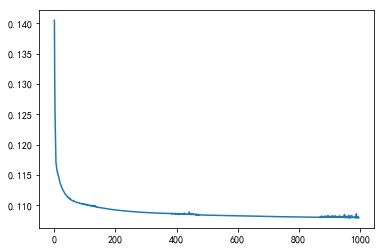

In [73]:
#第前两个数据比较大，踢掉
save_process = np.delete(save_process,[0,1])
plt.plot(range(len(save_process)),save_process)

### 使用模型，测试模型

In [87]:
test_csv = pd.read_csv("../data/test.csv")
test_csv.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [88]:
test_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [89]:
def preprocessing(data):
    """"""
    items = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
    data.Age[data.Age.isnull()] = data.Age.mean()
    test_x = data[items]
    test_x.Sex[test_x.Sex=='male'] = 1
    test_x.Sex[test_x.Sex=='female'] = 0
    test_x.Embarked[test_x.Embarked=='S'] = 0
    test_x.Embarked[test_x.Embarked=='C'] = 0.5
    test_x.Embarked[test_x.Embarked=='Q'] = 1
    return test_x

In [105]:
test_data_x = preprocessing(test_csv)

d:\sorf\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
d:\sorf\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
d:\sorf\anaconda3\lib\site-packages\pandas\core\generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
d:\sorf\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value i

In [121]:
test_data_y = sess.run(temp_y,feed_dict={X:test_data_x})

In [126]:
threshold = 0.90#90是比较理想的分割阈值

test_data_y[test_data_y > threshold] = 1
test_data_y[test_data_y <= threshold] = 0

test_data_y = test_data_y.reshape(418,)
test_data_y = test_data_y.astype(np.int32,copy=False)
test_data_y[test_data_y > threshold] = 1
test_data_y[test_data_y <= threshold] = 0
passengerId = np.arange(len(test_data_y))+892

In [128]:
test_data_y 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [124]:
out_cvs =  pd.DataFrame({'PassengerId':list(passengerId),'Survived':list(test_data_y)})

In [125]:
out_cvs.to_csv(path_or_buf = "../data/out_90.csv",index=False)